In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import matplotlib.patches as patches

In [2]:
dpath = "data\\pns-data-1024\\"

In [3]:
def power_to_kappa(power, kappa=0.1):
    power2 = np.array(power)
    power2 -= 40.0 # attenuation
    power2 = np.sqrt(10**((power2)/10)*0.001*50) # power to RMS voltage
    power2 *= 2*np.sqrt(2) # RMS to p2p voltage
    power2 *= (84.34 + 73.44) # polariton rabi rates in MHz
    power2 /= kappa
    return power2

In [4]:
RO_pars = {2: {'w0_bar': 7938583517.954844,
  'Delta_w0': 23755.491868634635,
  'offset_current': 0.00010021510713221545,
  'current_period': 0.0009493503542623457},
 3: {'w0_bar': 7957933696.535011,
  'Delta_w0': 31392.132330355056,
  'offset_current': 0.00011228801034756629,
  'current_period': 0.0009918943027910432},
 4: {'w0_bar': 7906150733.804379,
  'Delta_w0': 51422.49349279148,
  'offset_current': 9.386441602000106e-05,
  'current_period': 0.0010511817978725282},
 5: {'w0_bar': 7637227298.66511,
  'Delta_w0': 178756.05672841973,
  'offset_current': 0.0001221161169488895,
  'current_period': 0.001367265883154295},
 6: {'w0_bar': 7736143405.373202,
  'Delta_w0': 134262.11019658842,
  'offset_current': -0.00014579875856145003,
  'current_period': 0.0013243967174547866},
 7: {'w0_bar': 7817898475.382,
  'Delta_w0': 133937.9465530192,
  'offset_current': -0.00013535071830369418,
  'current_period': 0.0012689524588122673}}

In [5]:
pols = np.array([
    [5.2200, 5.2460],
    [5.2150, 5.2530],
    [5.2105, 5.2580]
])

# Load Frequency Dependence Data

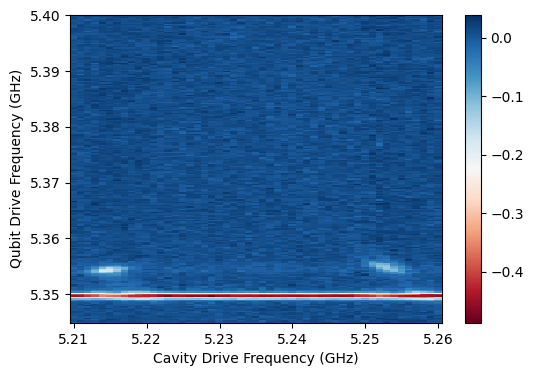

In [6]:
df = pd.read_csv(f'data\\pns-data-0824\\bus-Q4-pns_58.csv')
bfreqs_N2freq = np.array(np.unique(df['frequency']))
qfreqs_N2freq = np.array(np.unique(df['frequency.1']))
phase_N2freq = np.unwrap(np.array(df['phase']).reshape([len(bfreqs_N2freq), len(qfreqs_N2freq)]))
phase_N2freq = phase_N2freq.transpose()
phase_N2freq = phase_N2freq - np.mean(phase_N2freq, axis=0)
plt.figure(figsize=(6,4))
plt.pcolor(bfreqs_N2freq/1e9, qfreqs_N2freq/1e9, phase_N2freq, cmap='RdBu')
plt.colorbar()
plt.xlabel('Cavity Drive Frequency (GHz)')
plt.ylabel('Qubit Drive Frequency (GHz)')
plt.show()

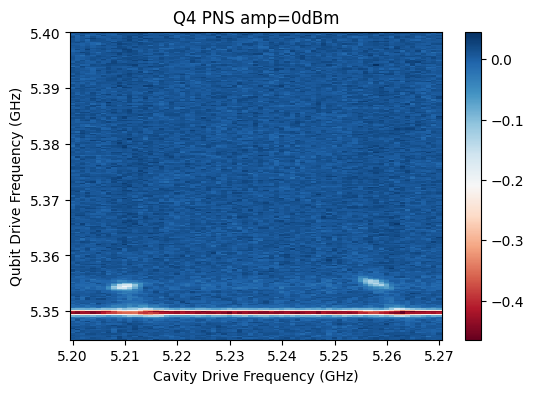

In [7]:
df = pd.read_csv(f'data\\pns-data-0824\\bus-Q4-pns_65.csv')
bfreqs_N3freq = np.array(np.unique(df['frequency']))
qfreqs_N3freq = np.array(np.unique(df['frequency.1']))
phase_N3freq = np.unwrap(np.array(df['phase']).reshape([len(bfreqs_N3freq), len(qfreqs_N3freq)]))
phase_N3freq = phase_N3freq.transpose()
phase_N3freq = phase_N3freq - np.mean(phase_N3freq, axis=0)
plt.figure(figsize=(6,4))
plt.pcolor(bfreqs_N3freq/1e9, qfreqs_N3freq/1e9, phase_N3freq, cmap='RdBu')
plt.colorbar()
plt.title(f'Q4 PNS amp=0dBm')
plt.xlabel('Cavity Drive Frequency (GHz)')
plt.ylabel('Qubit Drive Frequency (GHz)')
plt.show()

# Load Power Dependence Data

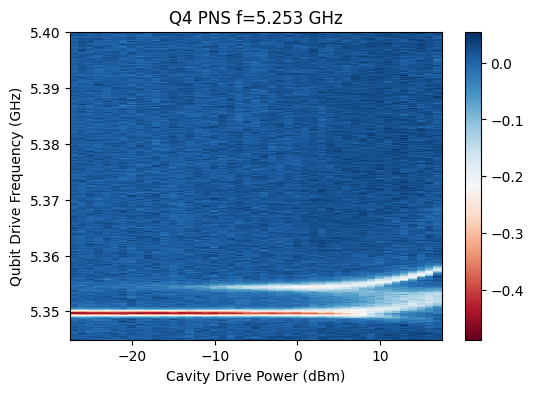

In [8]:
df = pd.read_csv(f'data\\pns-data-0824\\bus-Q4-pns_59.csv')
power_N2pow = np.array(np.unique(df['power']))
freqs_N2pow = np.array(np.unique(df['frequency']))
phase_N2pow = np.flip(np.unwrap(np.array(df['phase']).reshape([len(power_N2pow), len(freqs_N2pow)])), axis=0)
phase_N2pow = phase_N2pow.transpose()
phase_N2pow = phase_N2pow - np.mean(phase_N2pow, axis=0)
plt.figure(figsize=(6,4))
plt.pcolor(power_N2pow, freqs_N2pow/1e9, phase_N2pow, cmap='RdBu')
plt.colorbar()
plt.title(f'Q4 PNS f=5.253 GHz')
plt.xlabel('Cavity Drive Power (dBm)')
plt.ylabel('Qubit Drive Frequency (GHz)')
plt.show()

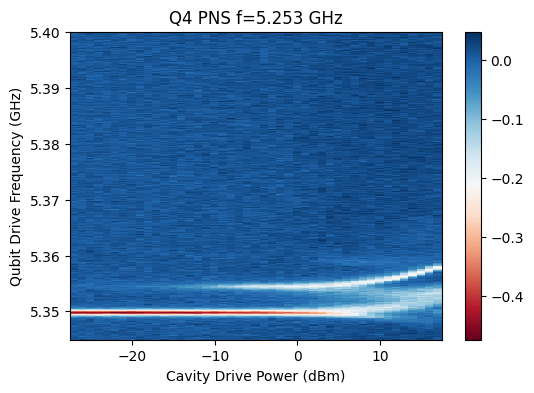

In [9]:
df = pd.read_csv(f'data\\pns-data-0824\\bus-Q4-pns_64.csv')
power_N3pow = np.array(np.unique(df['power']))
freqs_N3pow = np.array(np.unique(df['frequency']))
phase_N3pow = np.flip(np.unwrap(np.array(df['phase']).reshape([len(power_N3pow), len(freqs_N3pow)])), axis=0)
phase_N3pow = phase_N3pow.transpose()
phase_N3pow = phase_N3pow - np.mean(phase_N3pow, axis=0)
plt.figure(figsize=(6,4))
plt.pcolor(power_N3pow, freqs_N3pow/1e9, phase_N3pow, cmap='RdBu')
plt.colorbar()
plt.title(f'Q4 PNS f=5.253 GHz')
plt.xlabel('Cavity Drive Power (dBm)')
plt.ylabel('Qubit Drive Frequency (GHz)')
plt.show()

# Load g2 Data

In [16]:
df = pd.read_csv('fit-results\\g2-N2-exp.csv')
detune_N2 = np.unique(np.array(df['detuning']))
amp_N2 = np.unique(np.array(df['power']))
g2_N2_arr = np.array(df['g2']).reshape([len(detune_N2), len(amp_N2)])

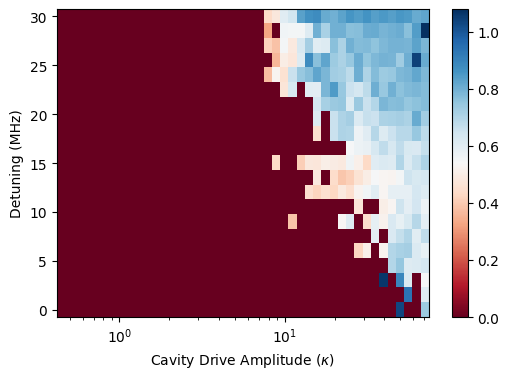

In [17]:
plt.figure(figsize=(6,4))
g2_N2_arr[np.isnan(g2_N2_arr)] = 0
plt.pcolor(power_to_kappa(amp_N2), np.flip(detune_N2)/1e6, g2_N2_arr, cmap='RdBu')
plt.xscale('log')
plt.xlabel('Cavity Drive Amplitude ($\kappa$)')
plt.ylabel('Detuning (MHz)')
plt.colorbar()
plt.show()

In [18]:
select_g2_array_N2 = np.vstack([  g2_N2_arr[:, 22],
                                  g2_N2_arr[:, 27],
                                  g2_N2_arr[:, 34],
                                  g2_N2_arr[:, 40],
                                  g2_N2_arr[:, 42]])

In [19]:
pow_labsN2 = np.array([power_to_kappa(amp_N2)[22], power_to_kappa(amp_N2)[27], power_to_kappa(amp_N2)[34], power_to_kappa(amp_N2)[40], power_to_kappa(amp_N2)[42]])

In [20]:
df = pd.read_csv('fit-results\\g2-N3-exp.csv')
detune_N3 = np.unique(np.array(df['detuning']))
amp_N3 = np.unique(np.array(df['power']))
g2_N3_arr = np.array(df['g2']).reshape([len(detune_N3), len(amp_N3)])

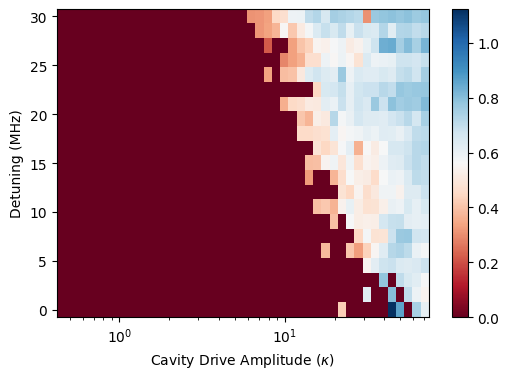

In [21]:
plt.figure(figsize=(6,4))
g2_N3_arr[np.isnan(g2_N3_arr)] = 0
plt.pcolor(power_to_kappa(amp_N3), np.flip(detune_N3)/1e6, g2_N3_arr, cmap='RdBu')
plt.xscale('log')
plt.xlabel('Cavity Drive Amplitude ($\kappa$)')
plt.ylabel('Detuning (MHz)')
plt.colorbar()
plt.show()

In [22]:
select_g2_array_N3 = np.vstack([  g2_N3_arr[:, 24],
                                  g2_N3_arr[:, 27],
                                  g2_N3_arr[:, 30],
                                  g2_N3_arr[:, 36],
                                  g2_N3_arr[:, 39]])

In [23]:
pow_labsN3 = np.array([power_to_kappa(amp_N3)[24], power_to_kappa(amp_N3)[27], power_to_kappa(amp_N3)[30], power_to_kappa(amp_N3)[36], power_to_kappa(amp_N3)[39]])

# Compiled Figure

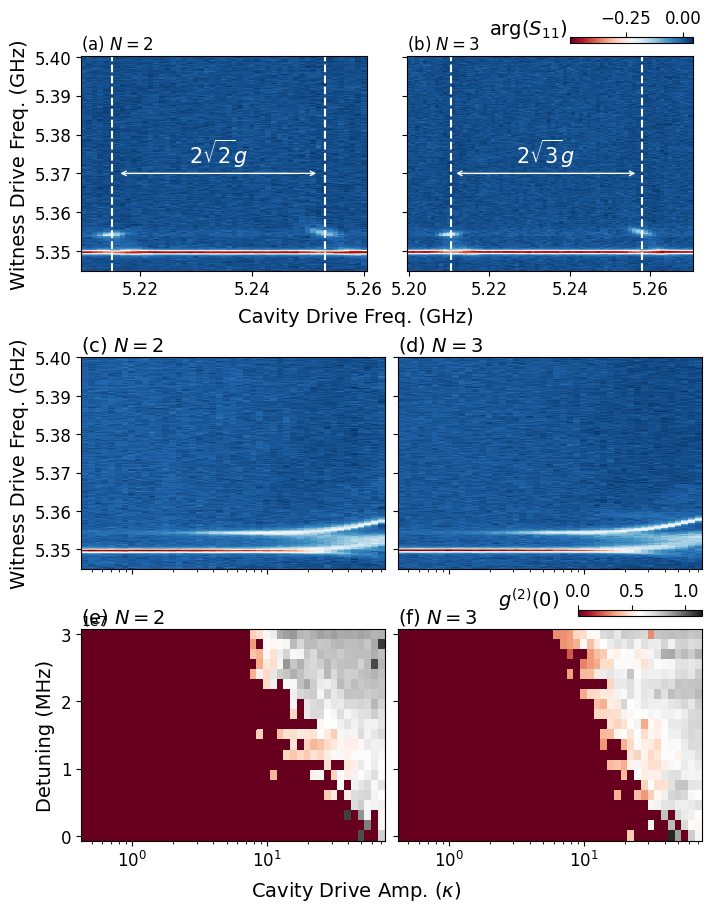

In [24]:
colors = plt.cm.viridis_r(np.linspace(0.1, 1.0, 5))

fig = plt.figure(layout='constrained', figsize=(7,9))
subfigs = fig.subfigures(2, 1, height_ratios=[4.5, 8], hspace=-0.05)

ax = subfigs[0].subplots(1, 2, sharey=True)
ax[0].pcolor(bfreqs_N2freq/1e9, qfreqs_N2freq/1e9, phase_N2freq, cmap='RdBu', vmin=-0.49, vmax=0.04, rasterized='auto')
# ax[0].set_title('$N=2$')
ax[0].set_ylabel('Witness Drive Freq. (GHz)', fontsize=14)
im = ax[1].pcolor(bfreqs_N3freq/1e9, qfreqs_N3freq/1e9, phase_N3freq, cmap='RdBu', vmin=-0.49, vmax=0.04, rasterized='auto')
# ax[1].set_title('$N=3$')
ax[0].axvline(pols[1,0], linestyle='dashed', color='white')
ax[0].axvline(pols[1,1], linestyle='dashed', color='white')
p1 = patches.FancyArrowPatch((5.216, 5.37), (5.252, 5.37), arrowstyle='<->', mutation_scale=8, color='white')
ax[0].annotate("$2\sqrt{2}g$", xy=(0.5*(5.216+5.252), 5.371), ha='center', va='bottom', fontsize=15, color='white')
ax[0].add_patch(p1)
ax[1].axvline(pols[2,0], linestyle='dashed', color='white')
ax[1].axvline(pols[2,1], linestyle='dashed', color='white')
p1 = patches.FancyArrowPatch((5.211, 5.37), (5.257, 5.37), arrowstyle='<->', mutation_scale=8, color='white')
ax[1].annotate("$2\sqrt{3}g$", xy=(0.5*(5.211+5.257), 5.371), ha='center', va='bottom', fontsize=15, color='white')
ax[1].add_patch(p1)
subfigs[0].supxlabel('Cavity Drive Freq. (GHz)', fontsize=14)
cb = subfigs[0].colorbar(im, ax=ax.ravel().tolist(), shrink=0.2, pad=-0.05, location='top', anchor=(1.0, 1.0))
cb.ax.set_ylabel('$\mathrm{arg}(S_{11})$', rotation=0, labelpad=30, fontsize=14)
cb.ax.tick_params(labelsize=12)
ax[0].annotate("(a) $N=2$", xy=(0.0, 1.11), xycoords='axes fraction', fontsize=12, ha='left', va='top')
ax[1].annotate("(b) $N=3$", xy=(0.0, 1.11), xycoords='axes fraction', fontsize=12, ha='left', va='top')
ax[0].tick_params(labelsize=12)
ax[1].tick_params(labelsize=12)

ax = subfigs[1].subplots(2, 2, sharey='row', sharex='col')
ax[0,0].pcolor(power_to_kappa(power_N2pow), freqs_N2pow/1e9, phase_N2pow, cmap='RdBu', rasterized='auto')
ax[0,0].set_xscale('log')
ax[0,0].set_ylabel('Witness Drive Freq. (GHz)', fontsize=14)
ax[0,1].pcolor(power_to_kappa(power_N3pow), freqs_N3pow/1e9, phase_N3pow, cmap='RdBu', rasterized='auto')
ax[0,1].set_xscale('log')
subfigs[1].supxlabel('Cavity Drive Amp. ($\kappa$)', fontsize=14)
ax[0,0].tick_params(labelsize=12)
ax[0,1].tick_params(labelsize=12)

im = ax[1,1].pcolor(power_to_kappa(amp_N3), np.flip(detune_N3), g2_N3_arr, cmap='RdGy', vmax=1.15, rasterized='auto')
ax[1,1].set_xscale('log')
ax[1,0].set_ylabel('Detuning (MHz)', fontsize=14)
ax[1,0].pcolor(power_to_kappa(amp_N2), np.flip(detune_N2), g2_N2_arr, cmap='RdGy', vmax=1.15, rasterized='auto')
ax[1,0].set_xscale('log')
cb = subfigs[1].colorbar(im, ax=ax[1,:].ravel().tolist(), shrink=0.2, pad=-0.05, location='top', anchor=(1.0, 1.0))
cb.ax.set_ylabel('$g^{(2)}(0)$', rotation=0, labelpad=35, fontsize=14)
cb.ax.tick_params(labelsize=12)
cb.ax.set_xticks([0, 0.5, 1.0])
ax[0,0].annotate("(c) $N=2$", xy=(0.0, 1.11), xycoords='axes fraction', fontsize=14, ha='left', va='top')
ax[0,1].annotate("(d) $N=3$", xy=(0.0, 1.11), xycoords='axes fraction', fontsize=14, ha='left', va='top')
ax[1,0].annotate("(e) $N=2$", xy=(0.0, 1.11), xycoords='axes fraction', fontsize=14, ha='left', va='top')
ax[1,1].annotate("(f) $N=3$", xy=(0.0, 1.11), xycoords='axes fraction', fontsize=14, ha='left', va='top')
ax[1,0].tick_params(labelsize=12)
ax[1,1].tick_params(labelsize=12)
fig.savefig('figures\\fig3-v3.pdf', bbox_inches='tight')